## Praktikum 1
### K-Means

#### Persiapan Data

In [2]:
# Persiapan data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('Iris.csv')

df.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

#### Seleksi Fitur 

In [3]:
X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

#### Plotting data untuk visualisasi

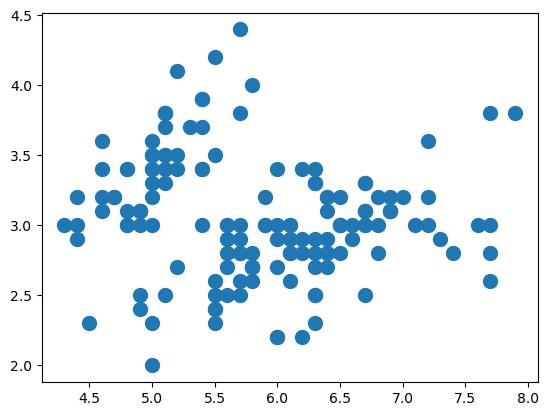

In [4]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100)

![Output!](images/prak1_1.png)

#### Membuat model K-Means

In [6]:
# Buat Model KMeans
# Kali ini kita coba menggunakan k=2 - anggap saja kita tidak tahu jumlah label ada 3 :)
from sklearn.cluster import KMeans

# Inisiasi obyek KMeans
cl_kmeans = KMeans(n_clusters=2)
# Fit dan predict model
y_kmeans = cl_kmeans.fit_predict(X)

d:\folder_laptop\apk_desktop\Anaconda\installation\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\folder_laptop\apk_desktop\Anaconda\installation\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


![Output!](images/prak1_2.png)

#### Plotting data hasil clustering berdasar Sepal Length dan Sepal Width

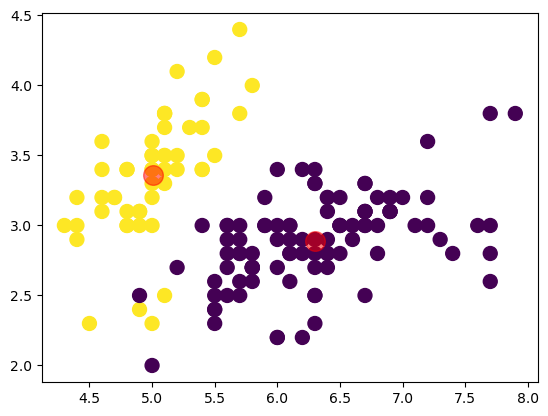

In [11]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100, c=y_kmeans)

# Plot centroid
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

#### Mengecek nilai SSE 

In [13]:
# Cek Nilai SSE
print(f'Nilai SSE: {cl_kmeans.inertia_}')

Nilai SSE: 152.36870647733906


#### Implementasi metode Elbow untuk menentukan nilai K yang optimal

d:\folder_laptop\apk_desktop\Anaconda\installation\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\folder_laptop\apk_desktop\Anaconda\installation\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\folder_laptop\apk_desktop\Anaconda\installation\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\folder_laptop\apk_desktop\Anaconda\installation\Lib\site-packages\sklearn\cluster

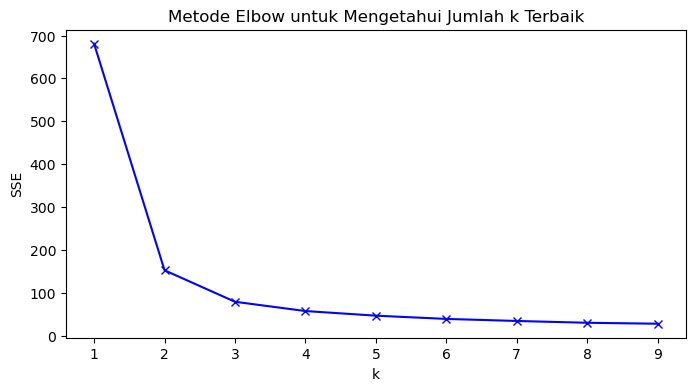

In [14]:
# Implementasi Metode Elbow

# List nilai SSE
sse = []

# Cari k terbaik dari 1-10
K = range(1,10)

# Cek nilai SSE setiap k
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(X)
 sse.append(kmeanModel.inertia_)


# Plotting the distortions
plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Metode Elbow untuk Mengetahui Jumlah k Terbaik")
plt.show()


#### Mengecek nilai SSE pada setiap nilai k

In [15]:
# Cek Nilai SSE setiap k
for idx, sse_val in enumerate(sse, start=1):
    print(f'k={idx}; SSE={sse_val}')

k=1; SSE=680.8244000000001
k=2; SSE=152.36870647733906
k=3; SSE=78.940841426146
k=4; SSE=57.317873214285704
k=5; SSE=46.53558205128205
k=6; SSE=38.964787851037855
k=7; SSE=34.19698216257427
k=8; SSE=29.96334557109558
k=9; SSE=27.768189393939398
